In [1]:
# Install all necessary libraries for this notebook
# -- scikit-learn: ML algorithms
# -- pandas/numpy: data handling
# -- matplotlib/seaborn: visualization
# -- xgboost: gradient boosting
# -- imbalanced-learn: SMOTE for class balancing
# -- joblib: save/load models
!pip install scikit-learn pandas matplotlib seaborn xgboost imbalanced-learn joblib --quiet



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# ---------------------------- Standard Library Imports ----------------------------
import os                           # For interacting with the operating system (e.g., file paths, directories)
import warnings                     # To manage and suppress warning messages
warnings.filterwarnings("ignore")   # Suppress all warnings for cleaner output

# ---------------------------- Data Handling and Manipulation ----------------------------
import numpy as np                  # For numerical computations and array handling
import pandas as pd                 # For data manipulation and analysis (DataFrames, CSVs, etc.)

# ---------------------------- Data Visualization ----------------------------
import matplotlib.pyplot as plt     # For creating static visualizations and plots
import seaborn as sns               # For advanced and aesthetic statistical plots built on top of matplotlib

# ---------------------------- Machine Learning (Scikit-learn) ----------------------------
from sklearn.model_selection import train_test_split         # Split data into training and testing sets
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder  # Data scaling and encoding
from sklearn.compose import ColumnTransformer                # Apply transformations to specific columns
from sklearn.pipeline import Pipeline                        # Chain preprocessing and model steps together
from sklearn.impute import SimpleImputer                     # Handle missing values in the dataset
from sklearn.metrics import (classification_report,          # Evaluate model performance (precision, recall, F1)
                             confusion_matrix,
                             accuracy_score,
                             f1_score)
from sklearn.linear_model import LogisticRegression           # Logistic Regression model
from sklearn.ensemble import RandomForestClassifier           # Ensemble model using decision trees
import xgboost as xgb                                         # Extreme Gradient Boosting for high-performance ML

# ---------------------------- Handling Imbalanced Datasets ----------------------------
from imblearn.over_sampling import SMOTE                      # Synthetic Minority Over-sampling Technique
from imblearn.pipeline import Pipeline as ImbPipeline          # Pipeline compatible with imbalanced-learn

# ---------------------------- Utility Libraries ----------------------------
import joblib                                                 # For saving and loading trained models efficiently
import ipaddress                                              # For working with and validating IP address data

# ---------------------------- Visualization Style Configuration ----------------------------
sns.set(style="whitegrid")                                    # Set seaborn style for cleaner visuals
plt.rcParams['figure.figsize'] = (12, 6)                      # Set default figure size for all plots

In [3]:
# ---------------------------- Load the Dataset ----------------------------

# Path to the local CSV file
LOCAL_FALLBACK = r"C:\Users\Asus\OneDrive\Desktop\SEM 3\DS_L\AnalyticaX\cybersecurity_attacks.csv"

# Function to load the dataset from the local path
def load_data():
    """
    Loads the cybersecurity dataset from a local CSV file.

    Returns:
        pd.DataFrame: Loaded dataset as a pandas DataFrame.
    Raises:
        FileNotFoundError: If the CSV file is not found at the specified path.
    """
    if os.path.exists(LOCAL_FALLBACK):
        print("Loading CSV from local path...")
        df = pd.read_csv(LOCAL_FALLBACK, low_memory=False)  # Read CSV file efficiently
        print("Loaded successfully.")
        return df
    else:
        raise FileNotFoundError("CSV file not found at local path.")

# Load the dataset into a DataFrame
df = load_data()

# Display basic dataset information
print("Shape:", df.shape)      # Print number of rows and columns
display(df.head())             # Display first few records for inspection

Loading CSV from local path...
Loaded successfully.
Shape: (40000, 25)


,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature

None

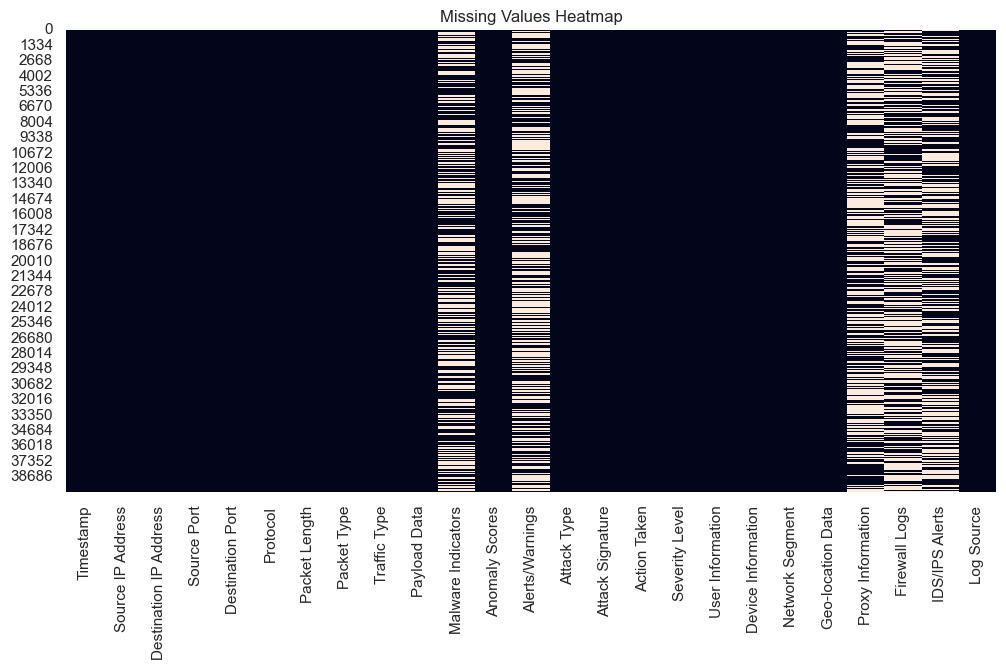

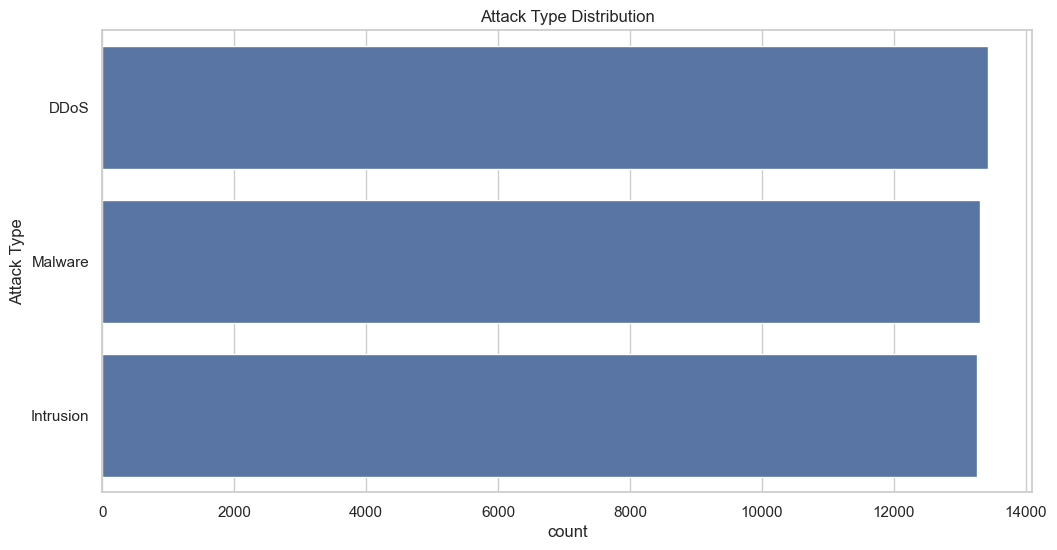

In [4]:
# ---------------------------- Quick Exploratory Data Analysis (EDA) ----------------------------

# Display dataset information
print("\n--- Dataset Info ---")
display(df.info())  # Shows column names, non-null counts, and data types

# ---------------------------- Missing Values Heatmap ----------------------------
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)   # Visualize missing values in the dataset
plt.title("Missing Values Heatmap")
plt.show()

# ---------------------------- Target Distribution ----------------------------
TARGET = 'Attack Type'  # Define the target column

# Check if target column exists
if TARGET not in df.columns:
    raise SystemExit("No 'Attack Type' column found. Edit TARGET variable.")

# Plot distribution of target classes
plt.figure(figsize=(12,6))
sns.countplot(
    data=df, 
    y=TARGET, 
    order=df[TARGET].value_counts().index  # Order bars by frequency
)
plt.title("Attack Type Distribution")
plt.show()

In [5]:
# ---------------------------- Feature Engineering and Preprocessing ----------------------------
# ---------------------------- Timestamp Features ----------------------------
if 'Timestamp' in df.columns:
    # Convert to datetime, coerce errors to NaT
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
    # Extract hour, day of week, and month from timestamp
    df['hour'] = df['Timestamp'].dt.hour
    df['dayofweek'] = df['Timestamp'].dt.dayofweek
    df['month'] = df['Timestamp'].dt.month

# ---------------------------- Port Binning ----------------------------
for pcol in ['Source Port', 'Destination Port']:
    if pcol in df.columns:
        # Convert ports to numeric
        df[pcol] = pd.to_numeric(df[pcol], errors='coerce')
        # Categorize ports into well-known, registered, and dynamic ranges
        df[pcol+'_bin'] = pd.cut(df[pcol], bins=[-1,1023,49151,65535],
                                 labels=['well_known','registered','dynamic'])

# ---------------------------- Packet Length Feature ----------------------------
if 'Packet Length' in df.columns:
    df['Packet Length'] = pd.to_numeric(df['Packet Length'], errors='coerce')
    # Log-transform packet length to reduce skewness
    df['pkt_len_log'] = np.log1p(df['Packet Length'])

# ---------------------------- IP Scope Feature ----------------------------
def ip_scope(ip):
    """
    Determines if an IP is internal (private) or external (public).
    Returns 'unknown' if IP is invalid.
    """
    try:
        ip_obj = ipaddress.ip_address(ip)
        return 'internal' if ip_obj.is_private else 'external'
    except Exception:
        return 'unknown'

for col in ['Source IP Address', 'Destination IP Address']:
    if col in df.columns:
        df[col+'_scope'] = df[col].astype(str).apply(ip_scope)

# ---------------------------- Payload Features ----------------------------
if 'Payload Data' in df.columns:
    # Length of payload
    df['payload_len'] = df['Payload Data'].astype(str).apply(len)
    # Flag if payload contains executable commands
    df['payload_has_exec'] = df['Payload Data'].astype(str).str.contains(
        r'\b(exec|bash|sh|cmd|powershell)\b', case=False, na=False
    ).astype(int)

# ---------------------------- Alerts/Warnings Feature ----------------------------
if 'Alerts/Warnings' in df.columns:
    # Binary feature indicating presence of alerts/warnings
    df['has_alert'] = df['Alerts/Warnings'].notnull().astype(int)

# ---------------------------- Malware Indicator Feature ----------------------------
if 'Malware Indicators' in df.columns:
    # Convert various truthy/falsy string values to binary 1/0
    df['Malware_bin'] = df['Malware Indicators'].map(
        lambda x: 1 if str(x).strip().lower() in ['true','yes','1']
        else (0 if str(x).strip().lower() in ['false','no','0'] else np.nan)
    )
# ---------------------------- Drop Columns That May Leak Information ----------------------------
# Columns like raw payloads or attack signatures could leak target information
TO_DROP = [c for c in ['Payload Data','Attack Signature','Log Source'] if c in df.columns]
df_model = df.drop(columns=TO_DROP)  # Prepare dataframe for modeling

In [6]:
# ---------------------------- Feature & Target Selection ----------------------------

# Define target variable
TARGET = 'Attack Type'

# Identify columns that may leak target information and drop them
LEAKING_COLS = [c for c in ['Action Taken', 'Attack Signature'] if c in df_model.columns]

# Features (X) and target (y)
X = df_model.drop(columns=[TARGET] + LEAKING_COLS)  # Drop target and leaking columns from features
y = df_model[TARGET].astype(str)                    # Ensure target is string type for classification

# ---------------------------- Remove Identifiers ----------------------------
# Columns that uniquely identify records, not useful for modeling
IDENTIFIERS = ['Timestamp', 'Source IP Address', 'Destination IP Address', 'User Information', 'Device Information']
X = X.drop(columns=[c for c in IDENTIFIERS if c in X.columns])

# ---------------------------- Separate Numeric and Categorical Columns ----------------------------
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()          # Numeric features
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()   # Categorical features

# ---------------------------- Encode Target Variable ----------------------------
le_target = LabelEncoder()
y_enc = le_target.fit_transform(y)  # Convert string labels to integers

# ---------------------------- Train-Test Split ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, 
    test_size=0.25,          # 25% of data for testing
    random_state=42,         # Ensures reproducibility
    stratify=y_enc           # Maintain class distribution in train and test sets
)

In [7]:
# ---------------------------- Preprocessing Pipelines (Memory-Safe Version) ----------------------------

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Ensure X exists from the previous feature selection step
# Separate numeric and categorical columns
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()         # Numeric features
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()    # Categorical features

# ---------------------------- Numeric Transformer ----------------------------
# Pipeline for numeric features: imputes missing values and scales features
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Replace missing values with median
    ('scaler', StandardScaler())                     # Standardize features to mean=0, std=1
])

# ---------------------------- Categorical Transformer ----------------------------
# Pipeline for categorical features: imputes missing values and encodes categories
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Fill missing with 'missing'
    ('ordinal', OrdinalEncoder(                                             
        handle_unknown='use_encoded_value', 
        unknown_value=-1                                                    # Encode unseen categories as -1
    ))
])

# ---------------------------- Column Transformer ----------------------------
# Apply numeric and categorical transformations to respective columns
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, cat_cols)
])

Training Logistic Regression...

Logistic Regression Classification Report:
              precision    recall  f1-score   support

        DDoS       0.34      0.10      0.16      3357
   Intrusion       0.33      0.34      0.33      3316
     Malware       0.33      0.57      0.42      3327

    accuracy                           0.33     10000
   macro avg       0.34      0.33      0.30     10000
weighted avg       0.34      0.33      0.30     10000



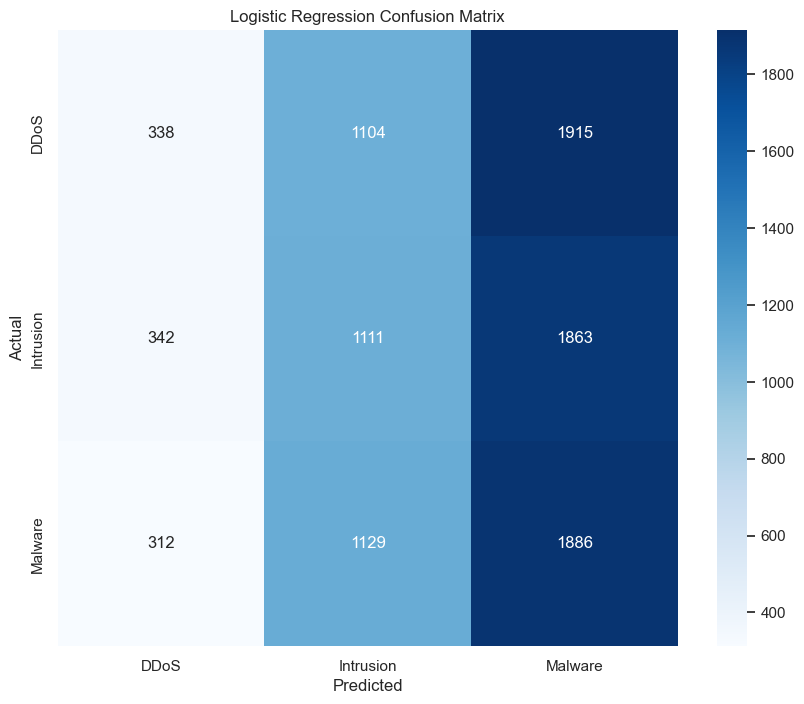

In [8]:
# ---------------------------- Logistic Regression Pipeline ----------------------------

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Define the pipeline with preprocessing, SMOTE for class imbalance, and Logistic Regression classifier
lr_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),                # Apply preprocessing transformations
    ('smote', SMOTE(random_state=42)),            # Handle class imbalance by oversampling minority classes
    ('clf', LogisticRegression(
        multi_class='multinomial',                # Support multiclass classification
        solver='saga',                            # Solver suitable for multinomial and sparse data
        max_iter=2000,                             # Increase iterations to ensure convergence
        class_weight='balanced'                    # Adjust weights inversely proportional to class frequencies
    ))
])

# ---------------------------- Train Model ----------------------------
print("Training Logistic Regression...")
lr_pipeline.fit(X_train, y_train)                 # Fit the pipeline on the training data

# Predict on test set
y_pred_lr = lr_pipeline.predict(X_test)

# ---------------------------- Evaluation ----------------------------
# Classification report
print("\nLogistic Regression Classification Report:")
print(classification_report(
    y_test, 
    y_pred_lr, 
    target_names=le_target.classes_               # Show class names instead of numeric labels
))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(10,8))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=le_target.classes_, 
    yticklabels=le_target.classes_
)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Decision Tree Classification Report:
              precision    recall  f1-score   support

     Malware       0.34      0.32      0.33      3357
        DDoS       0.32      0.32      0.32      3316
   Intrusion       0.34      0.35      0.34      3327

    accuracy                           0.33     10000
   macro avg       0.33      0.33      0.33     10000
weighted avg       0.33      0.33      0.33     10000



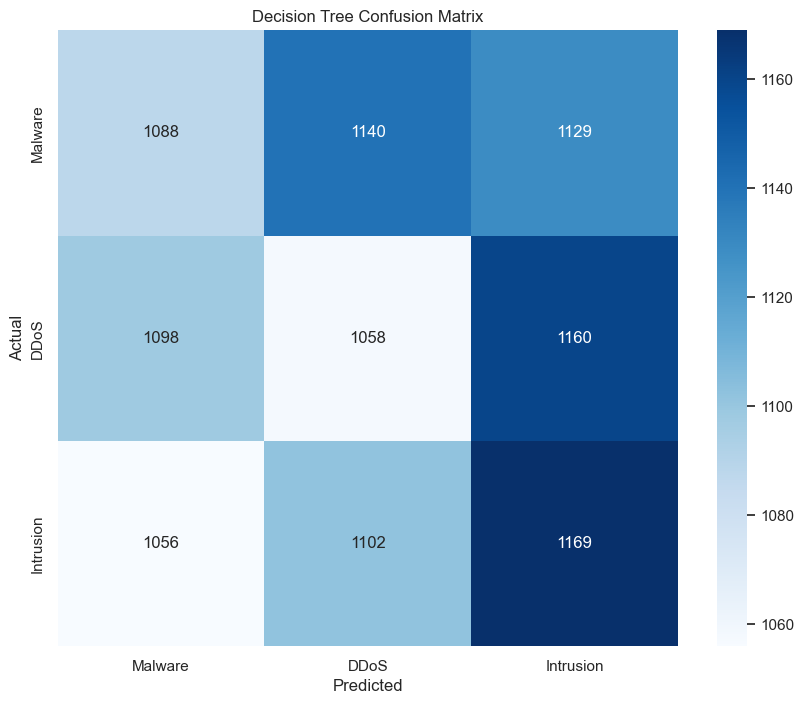

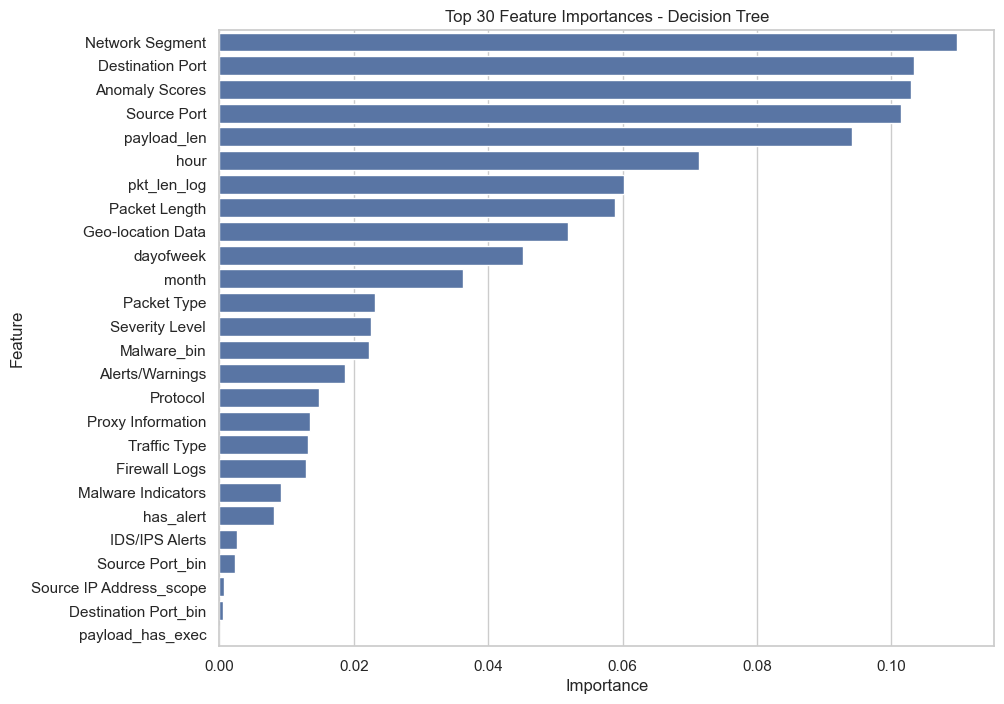

In [9]:
# ---------------------------- Decision Tree Pipeline ----------------------------

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# ---------------------------- 1) Define Pipeline ----------------------------
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),                 # Apply numeric + categorical preprocessing
    ('clf', DecisionTreeClassifier(
        random_state=42,                            # Ensure reproducibility
        class_weight='balanced'                     # Handle imbalanced classes
    ))
])

# ---------------------------- 2) Train the Pipeline ----------------------------
dt_pipeline.fit(X_train, y_train)                  # Fit the pipeline on training data

# ---------------------------- 3) Evaluation ----------------------------
# Predict on test set
y_pred_dt = dt_pipeline.predict(X_test)

# Classification report
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=y.unique()))  # Display per-class metrics

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(10,8))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=y.unique(), 
    yticklabels=y.unique()
)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---------------------------- 4) Safe Feature Names Function ----------------------------
def get_feature_names_safe(preprocessor, numeric_cols, cat_cols):
    """
    Returns a list of feature names for numeric and categorical columns.
    Ensures compatibility with column transformer outputs.
    """
    feature_names = numeric_cols.copy()
    if cat_cols:
        feature_names.extend(cat_cols)
    return feature_names

# ---------------------------- 5) Feature Importances ----------------------------
# Get feature names
feat_names = get_feature_names_safe(preprocessor, numeric_cols, cat_cols)

# Extract trained Decision Tree classifier
dt_clf = dt_pipeline.named_steps['clf']
importances = dt_clf.feature_importances_

# Ensure lengths match (sometimes transformer drops columns)
if len(feat_names) != len(importances):
    feat_names = feat_names[:len(importances)]

# Prepare DataFrame of top 30 features
fi = pd.DataFrame({'feature': feat_names, 'importance': importances}) \
        .sort_values('importance', ascending=False).head(30)

# Plot top 30 feature importances
plt.figure(figsize=(10,8))
sns.barplot(x='importance', y='feature', data=fi)
plt.title("Top 30 Feature Importances - Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()



Random Forest Classification Report:
              precision    recall  f1-score   support

        DDoS       0.34      0.26      0.30      3357
   Intrusion       0.32      0.26      0.29      3316
     Malware       0.33      0.47      0.39      3327

    accuracy                           0.33     10000
   macro avg       0.33      0.33      0.32     10000
weighted avg       0.33      0.33      0.32     10000



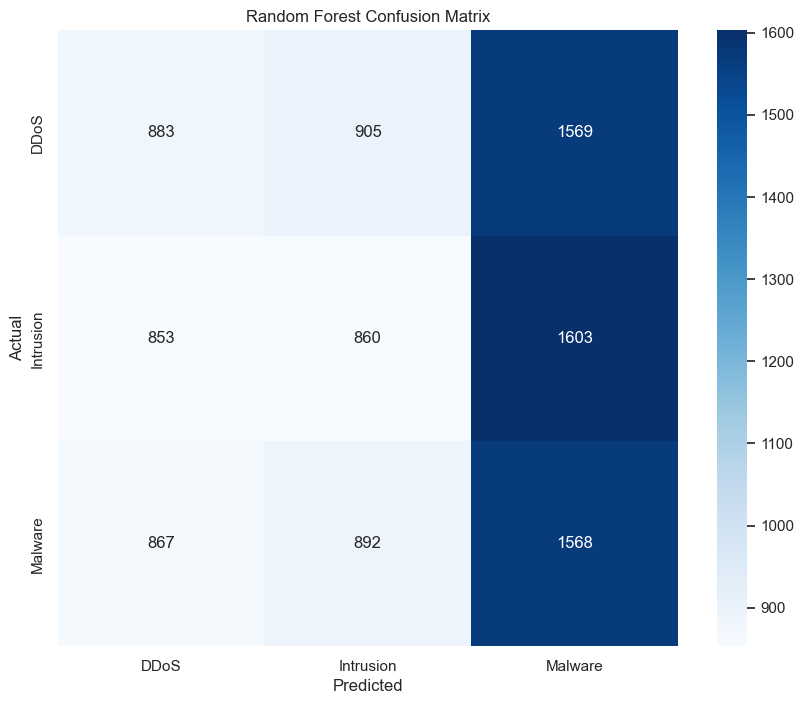

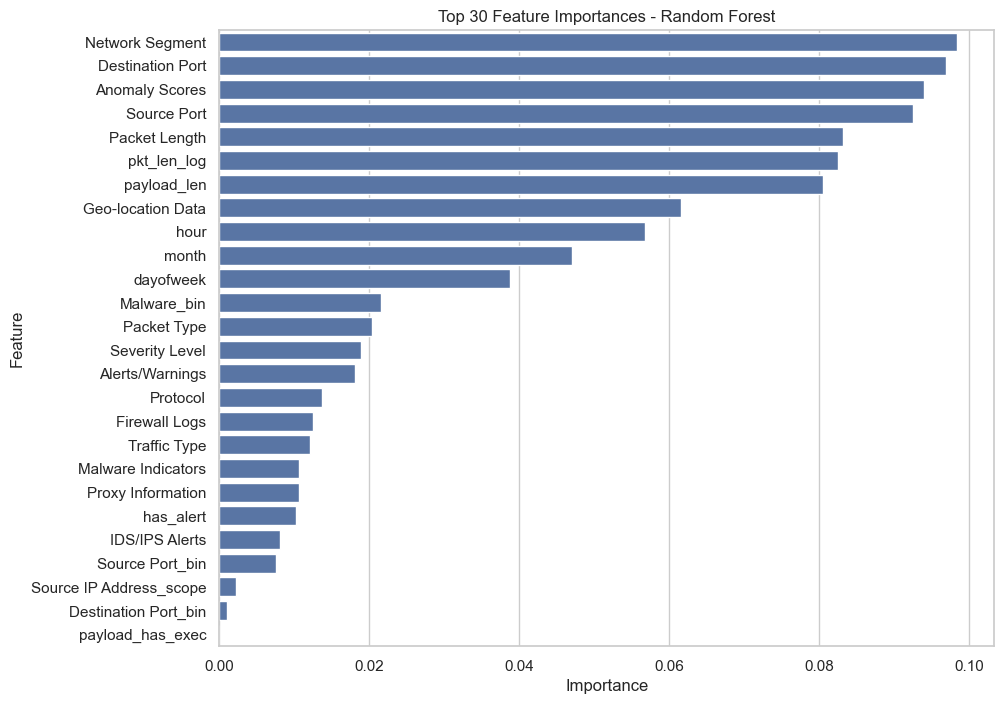

In [10]:
# ---------------------------- Random Forest Classifier ----------------------------

from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ---------------------------- 1) Define Random Forest Pipeline ----------------------------
# The pipeline includes preprocessing, SMOTE for class imbalance, and Random Forest classifier
rf_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),                 # Apply numeric and categorical preprocessing
    ('smote', SMOTE(random_state=42)),             # Handle class imbalance by oversampling minority classes
    ('clf', RandomForestClassifier(
        random_state=42,                            # Ensure reproducibility
        class_weight='balanced',                     # Adjust weights inversely proportional to class frequencies
        n_estimators=100,                            # Number of trees in the forest
        max_depth=10,                                # Maximum depth of each tree
        min_samples_split=5,                         # Minimum samples required to split a node
        min_samples_leaf=2                            # Minimum samples required at a leaf node
    ))
])

# ---------------------------- 2) Train the Random Forest Model ----------------------------
rf_pipeline.fit(X_train, y_train)                  # Fit the pipeline on the training data

# ---------------------------- 3) Make Predictions ----------------------------
y_pred_rf = rf_pipeline.predict(X_test)           # Predict on the test set

# ---------------------------- 4) Evaluate the Model ----------------------------
# Print classification metrics: precision, recall, F1-score, and support for each class
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=le_target.classes_))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10,8))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=le_target.classes_,
    yticklabels=le_target.classes_
)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---------------------------- 5) Feature Importances ----------------------------
# Extract the trained Random Forest classifier
rf_clf = rf_pipeline.named_steps['clf']
importances = rf_clf.feature_importances_

# Create a DataFrame of top 30 features by importance
fi = pd.DataFrame({'feature': feat_names, 'importance': importances}) \
        .sort_values('importance', ascending=False).head(30)

# Plot top 30 feature importances
plt.figure(figsize=(10,8))
sns.barplot(x='importance', y='feature', data=fi)
plt.title("Top 30 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


,Model,Accuracy,F1_weighted
1,Decision Tree,0.3315,0.331395
2,Random Forest,0.3311,0.324294
0,Logistic Regression,0.3335,0.302391


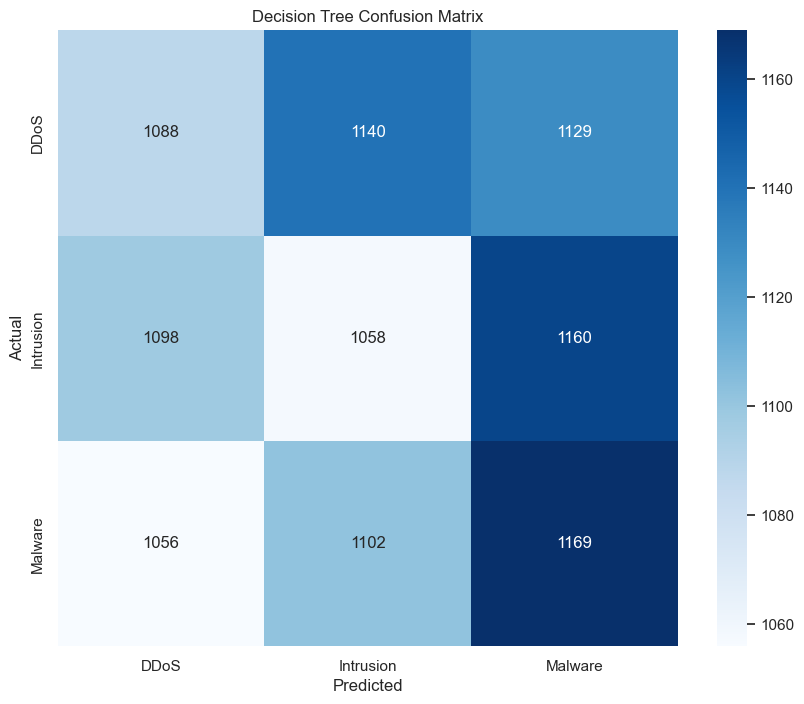

In [11]:
# ---------------------------- Model Comparison ----------------------------

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ---------------------------- Helper Function ----------------------------
def summarize(name, y_true, y_pred):
    """
    Computes accuracy and weighted F1 score for a given model.

    Args:
        name (str): Model name
        y_true (array-like): True target values
        y_pred (array-like): Predicted target values

    Returns:
        dict: Dictionary with model name, accuracy, and weighted F1 score
    """
    acc = accuracy_score(y_true, y_pred)                       # Overall accuracy
    f1 = f1_score(y_true, y_pred, average='weighted')         # Weighted F1 accounts for class imbalance
    return {'Model': name, 'Accuracy': acc, 'F1_weighted': f1}

# ---------------------------- Compile Results ----------------------------
# Include all models with predictions
results = [
    summarize('Logistic Regression', y_test, y_pred_lr),
    summarize('Decision Tree', y_test, y_pred_dt),
    summarize('Random Forest', y_test, y_pred_rf)
]

# Create DataFrame and sort by weighted F1 score (descending)
results_df = pd.DataFrame(results).sort_values('F1_weighted', ascending=False)
display(results_df)

# ---------------------------- Best Model Confusion Matrix ----------------------------
# Identify best model based on weighted F1 score
best_model_name = results_df.iloc[0]['Model']

# Map predictions to the best model
best_pred = {
    'Logistic Regression': y_pred_lr,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf
}[best_model_name]

# Plot confusion matrix for the best model
cm = confusion_matrix(y_test, best_pred)
plt.figure(figsize=(10,8))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=le_target.classes_,
    yticklabels=le_target.classes_
)
plt.title(f"{best_model_name} Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()